# **Space X  Falcon 9 First Stage Landing Prediction**


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


In [9]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV

In [11]:
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [23]:
from sklearn.metrics import confusion_matrix

## Load the dataframe


In [41]:
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

In [43]:
data = pd.read_csv(URL1)

In [47]:
data.head(2)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0


In [49]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'

In [51]:
X = pd.read_csv(URL2)

In [53]:
X.head(2)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [56]:
Y =  data['Class'].to_numpy()


In [63]:
X

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## TASK  2


In [65]:
# students get this 
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)

## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2.

In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


In [74]:
Y_test.shape #we can see we only have 18 test samples.

(18,)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


1."C": [0.01, 0.1, 1]:

C is a regularization parameter in logistic regression. It controls the trade-off between achieving a low training error and a low testing error (i.e., generalization).

A smaller value of C means stronger regularization, which can help prevent overfitting.

The list [0.01, 0.1, 1] specifies the different values of C that GridSearchCV will try during the search for the best parameters.

2.'penalty': ['l2']:

penalty specifies the type of regularization to be used.

'l2' refers to L2 regularization, also known as Ridge regularization. It adds a penalty equal to the square of the magnitude of coefficients.

In this case, only L2 regularization is being considered.

3.'solver': ['lbfgs']:

solver specifies the algorithm to be used for optimization.

'lbfgs' stands for Limited-memory Broyden–Fletcher–Goldfarb–Shanno algorithm. It is an optimization algorithm that is efficient for small to medium-sized datasets.

In this case, only the 'lbfgs' solver is being considered

In [88]:


# Define the parameters for GridSearchCV
parameters = {"C": [0.01, 0.1, 1], 'penalty': ['l2'], 'solver': ['lbfgs']}

# Create a logistic regression object
lr = LogisticRegression()

# Create a GridSearchCV object with cv=10
logreg_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=10)

# Fit the GridSearchCV object to the data
logreg_cv.fit(X_train, Y_train)

# Display the best parameters and the best score
print("tuned hpyerparameters :(best parameters) ", logreg_cv.best_params_)
print("Best score: ", logreg_cv.best_score_)


tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Best score:  0.8464285714285713


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [97]:
accuracy = logreg_cv.score(X_test, Y_test)
print("Accuracy on test data: {:.2f}%".format(accuracy * 100))



Accuracy on test data: 83.33%


Lets look at the confusion matrix:


In [111]:
# create func for COnfusion Matrix

def plot_confusion_matrix(y,y_predict):
    
   

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    #ax.set_xlabel('Predicted labels')
    #ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

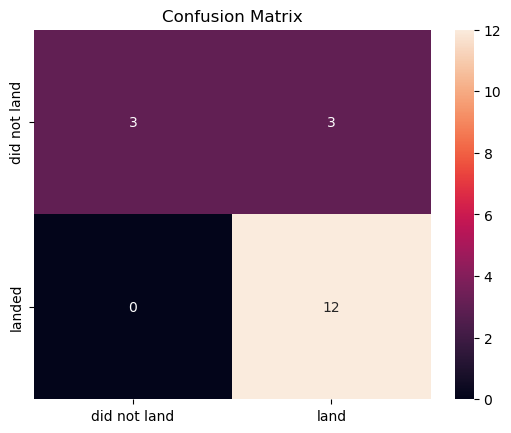

In [113]:
yhat=logreg_cv.predict(X_test) #find yhat

plot_confusion_matrix(Y_test,yhat) # call the func created

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [121]:
parameters = {'kernel':('linear', 'rbf','poly','sigmoid'),
              'C': np.logspace(-3, 3, 5), #Generates 5 values logarithmically spaced between 10^-3 and 10^3
              'gamma':np.logspace(-3, 3, 5)}  # i.e [0.001, 0.01, 0.1, 1, 10, 100, 1000].



In [123]:
svm = SVC() #svm object

In [125]:
svm_cv = GridSearchCV(estimator=svm, param_grid=parameters, cv=10)
svm_cv.fit(X_train, Y_train)  #fit



GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [126]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [133]:
accuracy = svm_cv.score(X_test, Y_test)


In [135]:
print("Accuracy on test data: {:.2f}%".format(accuracy * 100))


Accuracy on test data: 83.33%


We can plot the confusion matrix


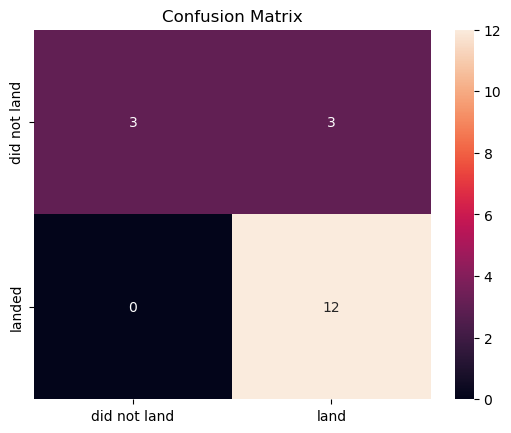

In [140]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


1.'criterion': ['gini', 'entropy']:

The criterion parameter specifies the function to measure the quality of a split.

'gini': Uses the Gini impurity.

'entropy': Uses the information gain (entropy).
-------------
2.'splitter': ['best', 'random']:

The splitter parameter specifies the strategy used to choose the split at each node.

'best': Chooses the best split.

'random': Chooses the best random split.
------------
3.'max_depth': [2*n for n in range(1, 10)]:

The max_depth parameter specifies the maximum depth of the tree.

[2*n for n in range(1, 10)] generates a list of values [2, 4, 6, 8, 10, 12, 14, 16, 18].

This means the maximum depth of the tree will be tested with these values.
---------
4.'max_features': ['auto', 'sqrt']:

The max_features parameter specifies the number of features to consider when looking for the best split.

'auto': Uses all features.

'sqrt': Uses the square root of the number of features.
------------
5.'min_samples_leaf': [1, 2, 4]:

The min_samples_leaf parameter specifies the minimum number of samples required to be at a leaf node.

[1, 2, 4] means the minimum number of samples at a leaf node will be tested with these values.
----------------
6.'min_samples_split': [2, 5, 10]:

The min_samples_split parameter specifies the minimum number of samples required to split an internal node.

[2, 5, 10] means the minimum number of samples to split an internal node will be tested with these values.

In [147]:
parameters = {'criterion': ['gini', 'entropy'], #quality of the split
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [149]:
tree_cv = GridSearchCV(estimator=tree, param_grid=parameters, cv=10) #decsion tree


In [ ]:
tree_cv.fit(X_train, Y_train)  #fit
 

In [153]:
print("Best parameters found: ", tree_cv.best_params_)
print("Best score: ", tree_cv.best_score_)


Best parameters found:  {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}
Best score:  0.8625


## TASK  9


In [164]:
accuracy = tree_cv.score(X_test, Y_test)


In [166]:
print("Accuracy on test data: {:.2f}%".format(accuracy * 100))


Accuracy on test data: 61.11%


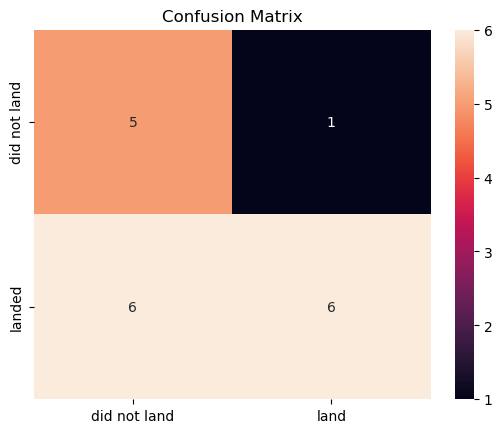

In [168]:
#PLot confusion

yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


p': [1, 2]:

The p parameter specifies the power parameter for the Minkowski metric.

p=1 corresponds to the Manhattan distance (L1 norm).

p=2 corresponds to the Euclidean distance (L2 norm).

GridSearchCV will try both values to determine which distance metric works best for the given data.

In [180]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]} # p is 'power parameter'

KNN = KNeighborsClassifier()

In [182]:
knn_cv = GridSearchCV(estimator=KNN, param_grid=parameters, cv=10) # K nearest neighbors


In [184]:
knn_cv.fit(X_train,Y_train) #fit

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [185]:
print("Best parameters found: ", knn_cv.best_params_)
print("Best score: ", knn_cv.best_score_)


Best parameters found:  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
Best score:  0.8482142857142858


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [193]:
accuracy = knn_cv.score(X_test, Y_test)


In [195]:
print("Accuracy on test data: {:.2f}%".format(accuracy * 100))


Accuracy on test data: 83.33%
